In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from astropy.io import fits

%matplotlib inline

In [2]:
class get_chain:
    
    def __init__(self, version='2022.1'):
        self.version = version
        self.output_pre_path = './output/'
    def find(self, name, path):
        for root, dirs, files in os.walk(path):
            if name in files:
                file_path = os.path.join(root, name)
                return file_path

    def read_chain(self, file_path, what_to_read):
        found_path = self.find(name=what_to_read+'.pickle', path=self.output_pre_path+str(file_path))
        
        samples = pd.read_pickle(found_path)

        chain = np.array(samples.results_internal['samples'])
        names = np.array(samples.names).flatten()

        chain_df = pd.DataFrame(data=chain, columns=names)

        chain_df['log_likelihood'] = samples.log_likelihood_list
        return chain_df


In [3]:
ParametricPSF = get_chain()
ParametricPSF = ParametricPSF.read_chain(file_path='./PSF_I/', what_to_read='samples')

ParametricZ = get_chain()
ParametricZ = ParametricZ.read_chain(file_path='./Z_I/', what_to_read='samples')

ParametricPSFZ = get_chain()
ParametricPSFZ = ParametricPSFZ.read_chain(file_path='./PSFZ_I/', what_to_read='samples')

In [4]:
def get_burnin(loglikelihood_array):
    max_loglikelihood = loglikelihood_array[-1]
    burnin_index = 0
    for i in range(0, len(loglikelihood_array)):
        burnin_index = i
        if loglikelihood_array[i]>max_loglikelihood*1.01:
            break
    return burnin_index

In [5]:
burnin_PSF=get_burnin(np.array(ParametricPSF['log_likelihood']))
burnin_Z=get_burnin(np.array(ParametricZ['log_likelihood']))
burnin_PSFZ=get_burnin(np.array(ParametricPSFZ['log_likelihood']))

In [6]:
ParametricPSF=ParametricPSF.iloc[:, [10, 11, 12, 13, 14]][burnin_PSF:]
#ParametricPSF.reset_index(inplace=True)

ParametricZ=ParametricZ.iloc[:, [10, 11, 12, 13, 14]][burnin_Z:]
#ParametricZ.reset_index(inplace=True)

ParametricPSFZ=ParametricPSFZ.iloc[:, [10, 11, 12, 13, 14]][burnin_PSFZ:]
#ParametricPSFZ.reset_index(inplace=True)

label_names = ['ε_1', 'ε_2', 'θ_E', 'γ_1', 'γ_2']
latex_names = ['$ε_1$', '$ε_2$', '$θ_E$', '$γ_1$', '$γ_2$']

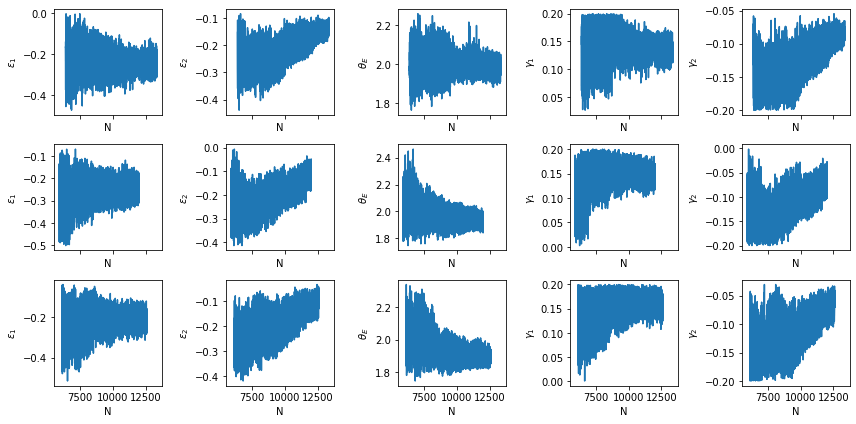

In [7]:
fig, ax = plt.subplots(3, 5, figsize=(12, 6), sharex=True)

column_names = ParametricPSF.columns

for i in range(0, len(column_names)):
    ax[0][i].plot(ParametricPSF[column_names[i]])
    ax[0][i].set_ylabel(latex_names[i])
    ax[0][i].set_xlabel('N')

for i in range(0, len(column_names)):
    ax[1][i].plot(ParametricZ[column_names[i]])
    ax[1][i].set_ylabel(latex_names[i])
    ax[1][i].set_xlabel('N')

for i in range(0, len(column_names)):
    ax[2][i].plot(ParametricPSFZ[column_names[i]])
    ax[2][i].set_ylabel(latex_names[i])
    ax[2][i].set_xlabel('N')

fig.tight_layout()


In [8]:
samples_0 = MCSamples(samples=np.array(ParametricPSF),
                      names = label_names,
                      labels = label_names)

samples_1 = MCSamples(samples=np.array(ParametricZ),
                      names = label_names,
                      labels = label_names)

samples_2 = MCSamples(samples=np.array(ParametricPSFZ),
                      names = label_names,
                      labels = label_names)

Removed no burn in
Removed no burn in
Removed no burn in


## Z vs PSF + Z

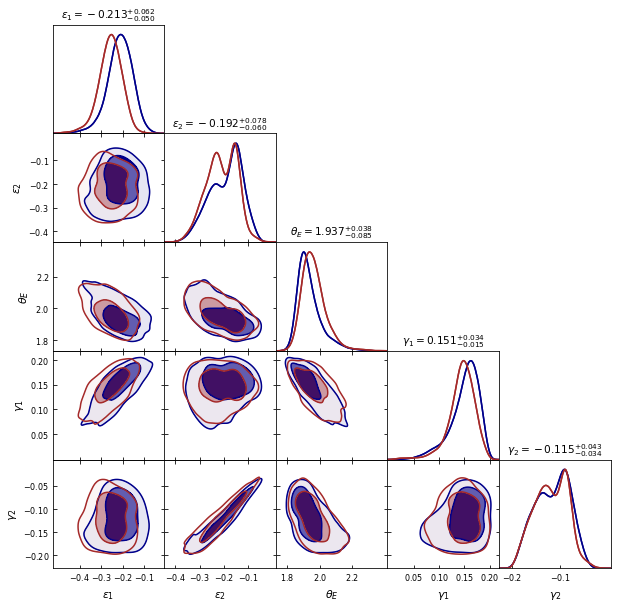

In [14]:
# need to move to another rep
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.title_limit_fontsize = 13.5
g.settings.alpha_filled_add=0.4
g.settings.linewidth = 3.
g.settings.line_labels =False
g.settings.solid_contour_palefactor = 0.9
#g.settings.colormap = 'binary'
g.triangle_plot([samples_2, samples_2, samples_1, samples_1],
                filled=[True, False, True, False],
                #legend_labels=['LogLikelihood Cap'],
                line_args=[{'ls':'-', 'color':'darkblue'}, {'ls':'-', 'color':'darkblue'}, {'ls':'-', 'color':'brown'}, {'ls':'-', 'color':'brown'}],
                contour_colors=['darkblue', 'darkblue', 'brown', 'brown'],
                title_limit=1,
                contour_lws=[1.5, 1.5, 1.5, 1.5])
#g.export(image_results_pre_path+'contour_plot_PSFZ.png')

## PSF vs PSF + Z

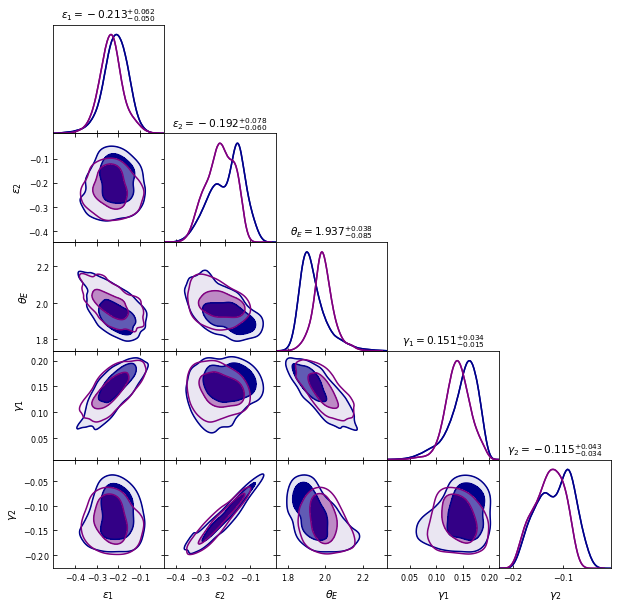

In [15]:
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.title_limit_fontsize = 13.5
g.settings.alpha_filled_add=0.4
g.settings.linewidth = 3.
g.settings.line_labels =False
g.settings.solid_contour_palefactor = 0.9
#g.settings.colormap = 'binary'
g.triangle_plot([samples_2, samples_2, samples_0, samples_0],
                filled=[True, False, True, False],
                #legend_labels=['LogLikelihood Cap'],
                line_args=[{'ls':'-', 'color':'darkblue'}, {'ls':'-', 'color':'darkblue'}, {'ls':'-', 'color':'purple'}, {'ls':'-', 'color':'purple'}],
                contour_colors=['darkblue', 'darkblue', 'purple', 'purple'],
                title_limit=1,
                contour_lws=[1.5, 1.5, 1.5, 1.5])
#g.export(image_results_pre_path+'contour_plot_PSFZ.png')

## Image comparison

In [23]:
OriginalImage = fits.open('./Results/GalfitSub.fits')[3].data


ImagePSF = fits.open('./Results/SourceParametricModelPSF.fits')[0].data
ImageZ = fits.open('./Results/SourceParametricModelZ.fits')[0].data
ImagePSFZ = fits.open('./Results/SourceParametricModelPSFZ.fits')[0].data

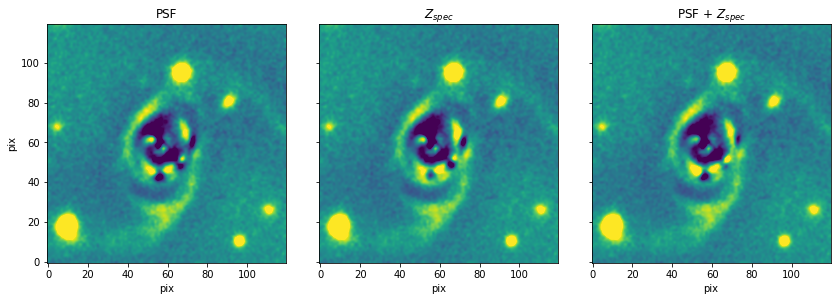

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

mean, std = np.mean(OriginalImage - ImagePSF), 2*np.std(OriginalImage - ImagePSF)
ax[0].imshow(OriginalImage - ImagePSF, origin='lower', interpolation='bicubic', vmin=mean-std, vmax=mean+std)
ax[0].set_title('PSF')
ax[0].set_xlabel('pix')
ax[0].set_ylabel('pix')

mean, std = np.mean(OriginalImage - ImageZ), 2*np.std(OriginalImage - ImagePSF)
ax[1].imshow(OriginalImage - ImageZ, origin='lower', interpolation='bicubic', vmin=mean-std, vmax=mean+std)
ax[1].set_title('$Z_{spec}$')
ax[1].set_xlabel('pix')

mean, std = np.mean(OriginalImage - ImagePSFZ), 2*np.std(OriginalImage - ImagePSFZ)
ax[2].imshow(OriginalImage - ImagePSFZ, origin='lower', interpolation='bicubic', vmin=mean-std, vmax=mean+std)
ax[2].set_title('PSF + $Z_{spec}$')
ax[2].set_xlabel('pix')

fig.tight_layout()